In [1]:
import numpy as np
import scipy.interpolate as si
import matplotlib.pyplot as plt

C:\Users\ishaa\anaconda\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### Fit Points From Control Points
Uses scipy to get a list of fit points given control points, degree, and interval. We used degree=5 for all of our airfoils. 

In [2]:
def scipy_bspline(cv, n=100, degree=3, periodic=False):
    """ Calculate n samples on a bspline

        cv :      Array ov control vertices
        n  :      Number of samples to return
        degree:   Curve degree
        periodic: True - Curve is closed
    """
    cv = np.asarray(cv)
    count = cv.shape[0]

    # Closed curve
    if periodic:
        kv = np.arange(-degree,count+degree+1)
        factor, fraction = divmod(count+degree+1, count)
        cv = np.roll(np.concatenate((cv,) * factor + (cv[:fraction],)),-1,axis=0)
        degree = np.clip(degree,1,degree)

    # Opened curve
    else:
        degree = np.clip(degree,1,count-1)
        kv = np.clip(np.arange(count+degree+1)-degree,0,count-degree)
    # Return samples
    max_param = count - (degree * (1-periodic))
    spl = si.BSpline(kv, cv, degree)
    return spl(np.linspace(0,max_param,n))

### Read in Control Points From .txt File
Reads in control points from a .txt file and generates an array of np.arrays representing the control points for each spline. Works for any number of splines and removes overlapping points. 

In [3]:
def control_points(file_path):
    splines = []
    cur_spline = []

    with open(file_path, 'r') as file:
        for line in file:
            if line.strip() == 'START':
                if cur_spline:
                    splines.append(np.array(cur_spline))
                    cur_spline = []
            elif line.strip() == 'END':
                continue
            else:
                values = list(map(float, line.split()))
                cur_spline.append(values[:2])

    if cur_spline:
        splines.append(np.array(cur_spline))
    

    return splines

# Example usage
file_path = 'ControlPoints.txt'  # Replace with the path to your file
splines_list = control_points(file_path)

In [4]:
splines_list

[array([[ 1.0000000e+00,  0.0000000e+00],
        [ 9.8846330e-01, -5.5860000e-05],
        [ 9.6569154e-01, -8.3412400e-03],
        [ 8.3549163e-01, -2.6800000e-05],
        [ 5.6900095e-01, -2.7533810e-02],
        [ 2.6848452e-01, -3.8793790e-02]]),
 array([[ 0.26848452, -0.03879379],
        [ 0.14735268, -0.04431773],
        [-0.08993058, -0.05564962],
        [-0.04781671,  0.01014795],
        [ 0.0343588 ,  0.08910789],
        [ 0.24585186,  0.10859467]]),
 array([[0.24585186, 0.10859467],
        [0.45018424, 0.1312708 ],
        [0.67376853, 0.08496525],
        [0.84009265, 0.05561393],
        [0.9768977 , 0.00922272],
        [1.        , 0.        ]])]

In [5]:
num_points = 15

# Generate angles
angles = np.linspace(0, 2 * np.pi, num_points)

# Generate control points
control_points = np.column_stack((np.cos(angles), np.sin(angles)))
control_points

array([[ 1.00000000e+00,  0.00000000e+00],
       [ 9.00968868e-01,  4.33883739e-01],
       [ 6.23489802e-01,  7.81831482e-01],
       [ 2.22520934e-01,  9.74927912e-01],
       [-2.22520934e-01,  9.74927912e-01],
       [-6.23489802e-01,  7.81831482e-01],
       [-9.00968868e-01,  4.33883739e-01],
       [-1.00000000e+00,  1.22464680e-16],
       [-9.00968868e-01, -4.33883739e-01],
       [-6.23489802e-01, -7.81831482e-01],
       [-2.22520934e-01, -9.74927912e-01],
       [ 2.22520934e-01, -9.74927912e-01],
       [ 6.23489802e-01, -7.81831482e-01],
       [ 9.00968868e-01, -4.33883739e-01],
       [ 1.00000000e+00, -2.44929360e-16]])

### Get and Plot Fitpoints
get_fitpoints() takes an array of splines (as control points) returns a flattened list of fitpoints as a list of points as tuples

plot_fitpoints() takes an array of splines (as control points) and plots the resulting fitted points with the optional paramater show_points to display the control points

In [4]:
# Returns flattened list of fitpoints as a list of tuple-points
def get_fitpoints(splines):
    points = []
    for s in splines:
        points.append(scipy_bspline(s, n=50, degree=5, periodic=False))
        
    tuples = []
    for spline in points:
        flattened_points = spline.reshape(-1, 2).tolist()
        flattened_tuples = [tuple(point) for point in flattened_points]
        tuples.append(flattened_tuples)
    tuples = [point for tup in tuples for point in tup]
    
    return tuples  

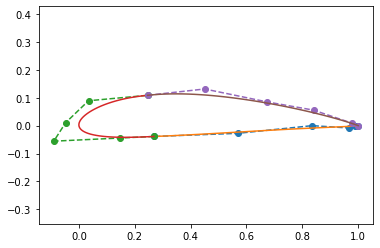

In [5]:
import sys
def plot_fitpoints(splines, show_points=True):
    for s in splines: 
        if show_points == True:
            plt.plot(s[:,0],s[:,1], 'o--', label='Control Points')
        p = scipy_bspline(s, n=50, degree=5, periodic=False)
        x,y = p.T
        # Setting equal aspect ratio for both axes to avoid distortion
        plt.axis('equal')
        plt.plot(x,y,)
        
        
plot_fitpoints(splines_list, show_points=True)


In [8]:
splines_list

[array([[ 1.0000000e+00,  0.0000000e+00],
        [ 9.8846330e-01, -5.5860000e-05],
        [ 9.6569154e-01, -8.3412400e-03],
        [ 8.3549163e-01, -2.6800000e-05],
        [ 5.6900095e-01, -2.7533810e-02],
        [ 2.6848452e-01, -3.8793790e-02]]),
 array([[ 0.26848452, -0.03879379],
        [ 0.14735268, -0.04431773],
        [-0.08993058, -0.05564962],
        [-0.04781671,  0.01014795],
        [ 0.0343588 ,  0.08910789],
        [ 0.24585186,  0.10859467]]),
 array([[0.24585186, 0.10859467],
        [0.45018424, 0.1312708 ],
        [0.67376853, 0.08496525],
        [0.84009265, 0.05561393],
        [0.9768977 , 0.00922272],
        [1.        , 0.        ]])]

### Calculate Non-Overlapping area and Plot Polygons
non_overlapping_area() does as the name suggests. It takes two lists of points representing two polygons and returns the non-overlapping area of the two polygons. 

plot_polygon() takes an ax, set of points, and a label and plots the polygon represented by the points. It has the optional parameter "fill" which shades in the area represented by the set of points. This can be used to represent the intersection of two polygons

In [6]:
from shapely.geometry import Polygon
from shapely.ops import unary_union

def non_overlapping_area(poly1_points, poly2_points):
    poly1 = Polygon(poly1_points)
    poly2 = Polygon(poly2_points)

    intersection = poly1.intersection(poly2)

    if intersection.is_empty:
        return poly1.union(poly2).area
    else:
        return poly1.union(poly2).area - intersection.area
    
def plot_polygon(ax, points, label, fill=False):
    if fill == True:
        x, y = zip(*points)
        plt.fill(x, y, alpha=0.5, label=label)
        ax.set_aspect('equal', adjustable='datalim')
        ax.legend()
        
    else:
        poly = Polygon(points)
        x, y = poly.exterior.xy
        ax.plot(x, y, label=label)
        ax.set_aspect('equal', adjustable='datalim')
        ax.legend()

Non-overlapping area: 0.6029518722875568


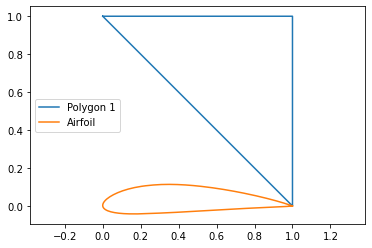

In [7]:
# Example usage
poly1_points = [(0, 1), (0, 1), (1, 1), (1, 0)]
airfoil_points = get_fitpoints(splines_list)

result = non_overlapping_area(poly1_points, airfoil_points)
print(f"Non-overlapping area: {result}")

fig, ax = plt.subplots()
plot_polygon(ax, poly1_points, 'Polygon 1')
plot_polygon(ax, airfoil_points, 'Airfoil')


### GA Optimization (As Described by Malcolm)


In [8]:
airfoil_points = get_fitpoints(splines_list)

# Gets non overlapping area from NACA0012 and the fitpoints from the algorithms generated control points
def cost(control_points):
    generated_points = get_fitpoints(control_points)
    area = non_overlapping_area(airfoil_points, generated_points)
    
    return area

# Fitness function to lead us to a fitted NACA0012
def fitness(control_points):
    area = cost(control_points)

    if area == 0:
        return 99999
    
    else:
        return 1/area
    

#### Notes
- 

Generation 0 best solution is: 
(1.150776774868868, [array([[ 0.00369443,  0.00354676],
       [-0.00189765,  0.25342751],
       [ 0.00605401,  0.49126761],
       [ 0.00693212,  0.74927894],
       [ 0.00935819,  1.00765477],
       [ 0.24167854,  0.98766997]]), array([[0.24167854, 0.98766997],
       [0.49555594, 1.01309796],
       [0.75137646, 0.98804402],
       [1.0051238 , 0.98405779],
       [1.01264231, 0.74971886],
       [0.98194981, 0.50904519]]), array([[ 0.98194981,  0.50904519],
       [ 0.99368787,  0.2552517 ],
       [ 0.98954592, -0.00725756],
       [ 0.74442791, -0.00714191],
       [ 0.24218602, -0.00936573],
       [ 0.00369443,  0.00354676]])])
Generation 1 best solution is: 
(1.172807013939279, [array([[ 0.01046518, -0.00252159],
       [ 0.01231379,  0.24398693],
       [ 0.00867618,  0.49855416],
       [ 0.01159044,  0.74204853],
       [-0.00944101,  0.99881315],
       [ 0.24428434,  0.98450981]]), array([[0.24428434, 0.98450981],
       [0.5066707 , 1.00

Generation 12 best solution is: 
(1.55719274844812, [array([[-7.33882196e-04, -1.12277370e-02],
       [ 5.90298617e-02,  2.86433277e-01],
       [ 5.87882885e-02,  5.32134704e-01],
       [ 5.73575150e-02,  7.98530551e-01],
       [ 5.93572599e-02,  1.02134095e+00],
       [ 1.69100553e-01,  8.68549145e-01]]), array([[0.16910055, 0.86854914],
       [0.42878339, 0.90475934],
       [0.65132583, 0.88411198],
       [0.91792132, 0.90358227],
       [0.87835589, 0.65486181],
       [0.84949281, 0.41184899]]), array([[ 8.49492808e-01,  4.11848987e-01],
       [ 8.94301875e-01,  1.94854045e-01],
       [ 9.47247174e-01, -3.80412642e-02],
       [ 6.90873768e-01, -3.89521647e-02],
       [ 1.90363077e-01, -6.17486234e-02],
       [-7.33882196e-04, -1.12277370e-02]])])
Generation 13 best solution is: 
(1.6027304720008797, [array([[ 0.00396292, -0.00638615],
       [ 0.06576948,  0.29241139],
       [ 0.05530619,  0.52577748],
       [ 0.07804949,  0.82745554],
       [ 0.06588315,  1.0141367

Generation 24 best solution is: 
(2.2129518212109507, [array([[0.01437757, 0.00425326],
       [0.09634551, 0.31870597],
       [0.12371581, 0.5991923 ],
       [0.0743901 , 0.82468782],
       [0.08246255, 1.05385133],
       [0.0944028 , 0.7587167 ]]), array([[0.0944028 , 0.7587167 ],
       [0.32611663, 0.76946845],
       [0.55710811, 0.78094312],
       [0.7925651 , 0.77921763],
       [0.7897761 , 0.57401335],
       [0.70664624, 0.29284724]]), array([[ 0.70664624,  0.29284724],
       [ 0.80147377,  0.13559922],
       [ 0.86540059, -0.05561961],
       [ 0.67174996, -0.03125286],
       [ 0.17361512, -0.08128256],
       [ 0.01437757,  0.00425326]])])
Generation 25 best solution is: 
(2.266482348468918, [array([[0.02610602, 0.01606098],
       [0.1117134 , 0.3380839 ],
       [0.12599328, 0.60177779],
       [0.07712364, 0.82067867],
       [0.08370823, 1.04746804],
       [0.10876421, 0.77751648]]), array([[0.10876421, 0.77751648],
       [0.32816368, 0.77046965],
       [0.54

Generation 37 best solution is: 
(3.2102609280903804, [array([[0.04795342, 0.03800551],
       [0.17736451, 0.40182196],
       [0.19151601, 0.66433719],
       [0.04792555, 0.80112166],
       [0.11900289, 1.05680435],
       [0.12559175, 0.75171055]]), array([[0.12559175, 0.75171055],
       [0.25430339, 0.67217666],
       [0.45718355, 0.67440915],
       [0.66819023, 0.65601233],
       [0.70023292, 0.48915772],
       [0.58448876, 0.19650365]]), array([[ 0.58448876,  0.19650365],
       [ 0.7086157 ,  0.06339573],
       [ 0.85253974, -0.0491485 ],
       [ 0.70710818, -0.0022336 ],
       [ 0.14645539, -0.10035904],
       [ 0.04795342,  0.03800551]])])
Generation 38 best solution is: 
(3.403554299193731, [array([[0.02844121, 0.01853744],
       [0.19635607, 0.42074475],
       [0.19727041, 0.66760276],
       [0.0698892 , 0.83762143],
       [0.10568773, 1.04508576],
       [0.1339722 , 0.75758818]]), array([[0.1339722 , 0.75758818],
       [0.22388432, 0.62975497],
       [0.44

Generation 50 best solution is: 
(5.224619186620861, [array([[0.06177853, 0.05168921],
       [0.27040327, 0.49248181],
       [0.20720151, 0.67133264],
       [0.04728495, 0.77557081],
       [0.06113976, 1.01248746],
       [0.13862737, 0.74812019]]), array([[0.13862737, 0.74812019],
       [0.16461247, 0.54848306],
       [0.35531058, 0.55682563],
       [0.55359098, 0.54205852],
       [0.59131101, 0.39355578],
       [0.47561791, 0.10668448]]), array([[ 0.47561791,  0.10668448],
       [ 0.75456692,  0.09624401],
       [ 0.87151065, -0.02514346],
       [ 0.73782152,  0.00469941],
       [ 0.12704339, -0.12931725],
       [ 0.06177853,  0.05168921]])])
Generation 51 best solution is: 
(5.445423466494284, [array([[0.08054946, 0.07018218],
       [0.26704243, 0.49111304],
       [0.22367923, 0.68790772],
       [0.04626801, 0.77634966],
       [0.07013292, 1.01958152],
       [0.13912537, 0.74321483]]), array([[0.13912537, 0.74321483],
       [0.17485981, 0.55982265],
       [0.355

Generation 63 best solution is: 
(7.703688065497659, [array([[0.08665525, 0.07675488],
       [0.33151641, 0.55235054],
       [0.19427226, 0.64387498],
       [0.01980211, 0.74772114],
       [0.04877984, 1.02667904],
       [0.15235876, 0.72987373]]), array([[0.15235876, 0.72987373],
       [0.1540124 , 0.54796808],
       [0.28471036, 0.48184559],
       [0.44469979, 0.43368089],
       [0.46649061, 0.27493923],
       [0.43075813, 0.08595261]]), array([[ 0.43075813,  0.08595261],
       [ 0.82213077,  0.15231981],
       [ 0.85050933, -0.04653346],
       [ 0.80926228,  0.02701362],
       [ 0.09014709, -0.16263596],
       [ 0.08665525,  0.07675488]])])
Generation 64 best solution is: 
(7.907883648783158, [array([[0.09344402, 0.08373057],
       [0.33611623, 0.56931743],
       [0.21465076, 0.66794138],
       [0.02592559, 0.75018577],
       [0.04629647, 1.03436932],
       [0.16411264, 0.74463837]]), array([[0.16411264, 0.74463837],
       [0.18429512, 0.55658503],
       [0.277

Generation 76 best solution is: 
(11.449940897701762, [array([[0.0882246 , 0.07848512],
       [0.37449525, 0.60303114],
       [0.19513811, 0.62890914],
       [0.0171701 , 0.71990583],
       [0.06481145, 1.01526013],
       [0.14997342, 0.70192586]]), array([[0.14997342, 0.70192586],
       [0.2234551 , 0.59879537],
       [0.22667308, 0.42602813],
       [0.32885665, 0.31841621],
       [0.36219556, 0.17893935],
       [0.42485621, 0.0880641 ]]), array([[ 0.42485621,  0.0880641 ],
       [ 0.80007754,  0.15842555],
       [ 0.91897194, -0.03767945],
       [ 0.80373882,  0.05807687],
       [ 0.04204265, -0.20480271],
       [ 0.0882246 ,  0.07848512]])])
Generation 77 best solution is: 
(11.814718084214846, [array([[0.08310151, 0.07328677],
       [0.36543347, 0.59936736],
       [0.18911071, 0.61869481],
       [0.02831813, 0.73332637],
       [0.0828836 , 1.05509361],
       [0.15109844, 0.70095385]]), array([[0.15109844, 0.70095385],
       [0.23391541, 0.61690167],
       [0.1

Generation 89 best solution is: 
(16.19780371823211, [array([[ 0.09488597,  0.08537858],
       [ 0.36335173,  0.58469504],
       [ 0.15179836,  0.5695334 ],
       [-0.00548227,  0.69379072],
       [ 0.02643471,  0.97914219],
       [ 0.12100476,  0.65399634]]), array([[0.12100476, 0.65399634],
       [0.26544291, 0.65371103],
       [0.16072871, 0.35457519],
       [0.25653586, 0.24626054],
       [0.26477904, 0.08273336],
       [0.40501305, 0.09145237]]), array([[ 0.40501305,  0.09145237],
       [ 0.76732235,  0.13358366],
       [ 0.96004266, -0.04589112],
       [ 0.84842272,  0.09676918],
       [ 0.04697998, -0.21536052],
       [ 0.09488597,  0.08537858]])])
Generation 90 best solution is: 
(16.397278495886717, [array([[ 0.08868271,  0.07928299],
       [ 0.36629286,  0.58774123],
       [ 0.16840437,  0.59525114],
       [-0.00238308,  0.70887991],
       [ 0.01756917,  0.97000218],
       [ 0.12678055,  0.66278269]]), array([[0.12678055, 0.66278269],
       [0.25636271, 0

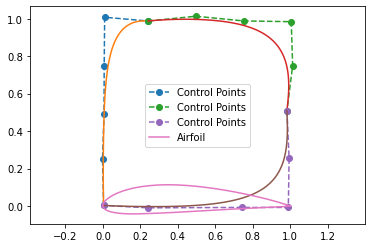

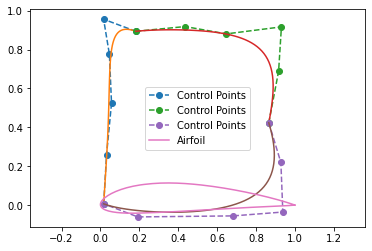

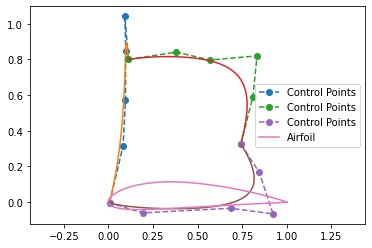

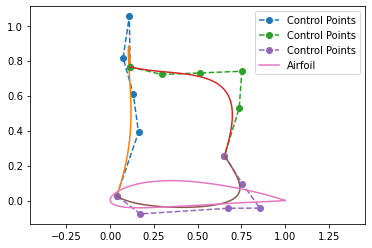

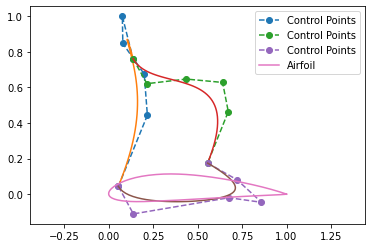

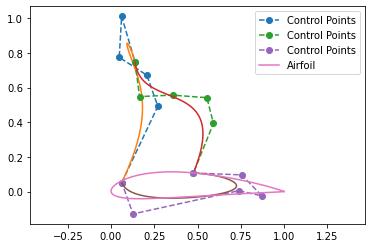

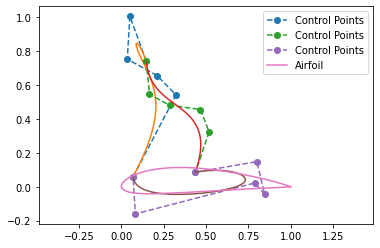

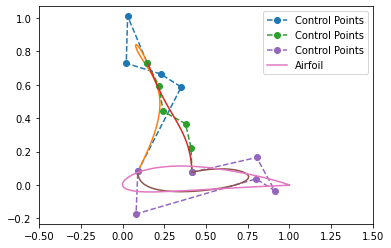

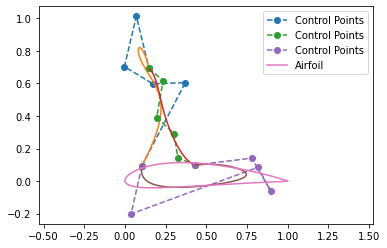

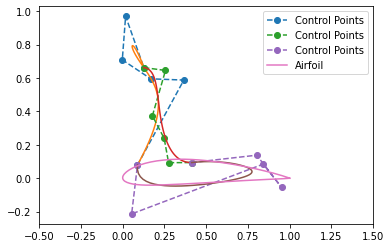

In [14]:
from shapely.validation import make_valid

num_generations = 100
num_samples = 100
ran_range = 30
alpha = 0.01

# Mutation function
def mut(num):
    return (num + np.random.uniform(-alpha, alpha)) * np.random.uniform(1-alpha, 1+alpha)

# Set of slightly different squares to start with
random_points = []
for i in range(num_samples):
    shared1 = [mut(0), mut(0)]
    shared2 = [mut(0.25), mut(1)]
    shared3 = [mut(1), mut(0.5)]
    shape = [
        np.array([shared1,
                  [mut(0), mut(0.25)],
                  [mut(0), mut(0.5)],
                  [mut(0), mut(0.75)],
                  [mut(0), mut(1)],
                  shared2]),
        np.array([shared2,
                  [mut(0.5), mut(1)],
                  [mut(0.75), mut(1)],
                  [mut(1), mut(1)],
                  [mut(1), mut(0.75)],
                  shared3]),
        np.array([shared3,
                  [mut(1), mut(0.25)],
                  [mut(1), mut(0)],
                  [mut(0.75), mut(0)],
                  [mut(0.25), mut(0)],
                  shared1])]
    random_points.append(shape)

display_pts = []


for i in range(num_generations):
    # Rank solutions in reverse sorted order
    ranking = []

    for pts in random_points:
        # Checks to remove self intersecting geometries
        coords = get_fitpoints(pts)
        p = Polygon(coords)
        if type(make_valid(p)) == type(p):
            ranking.append((fitness(pts), pts))
    
    ranking.sort()
    ranking.reverse()

    print(f"Generation {i} best solution is: ")
    print(ranking[0])

    if i%10 == 0:
        fig, ax = plt.subplots()
        plot_fitpoints(ranking[0][1], show_points=True)
        plot_polygon(ax, airfoil_points, 'Airfoil')
        display_pts.append(ranking[0][1])

    # Randomly select and mutate next generation of tuples
    pt1, pt2, pt3, pt4, pt5, pt6, pt7, pt8, pt9, pt10, pt11, pt12, pt13, pt14, pt15 = ([] for i in range(15))

    for pt in ranking[:10]:
        pt1.append(pt[1][0][0])
        pt2.append(pt[1][0][1])
        pt3.append(pt[1][0][2])
        pt4.append(pt[1][0][3])
        pt5.append(pt[1][0][4])
        pt6.append(pt[1][1][0])
        pt7.append(pt[1][1][1])
        pt8.append(pt[1][1][2])
        pt9.append(pt[1][1][3])
        pt10.append(pt[1][1][4])
        pt11.append(pt[1][2][0])
        pt12.append(pt[1][2][1])
        pt13.append(pt[1][2][2])
        pt14.append(pt[1][2][3])
        pt15.append(pt[1][2][4])

    next_gen = []
    for i in range(num_samples):
        p1 = mut(pt1[np.random.randint(0, len(pt1) - 1)])
        p2 = mut(pt2[np.random.randint(0, len(pt2) - 1)])
        p3 = mut(pt3[np.random.randint(0, len(pt3) - 1)])
        p4 = mut(pt4[np.random.randint(0, len(pt4) - 1)])
        p5 = mut(pt5[np.random.randint(0, len(pt5) - 1)])
        p6 = mut(pt6[np.random.randint(0, len(pt6) - 1)])
        p7 = mut(pt7[np.random.randint(0, len(pt7) - 1)])
        p8 = mut(pt8[np.random.randint(0, len(pt8) - 1)])
        p9 = mut(pt9[np.random.randint(0, len(pt9) - 1)])
        p10 = mut(pt10[np.random.randint(0, len(pt10) - 1)])
        p11 = mut(pt11[np.random.randint(0, len(pt11) - 1)])
        p12 = mut(pt12[np.random.randint(0, len(pt12) - 1)])
        p13 = mut(pt13[np.random.randint(0, len(pt13) - 1)])
        p14 = mut(pt14[np.random.randint(0, len(pt14) - 1)])
        p15 = mut(pt15[np.random.randint(0, len(pt15) - 1)])


        new_pts = [np.array([p1, p2, p3, p4, p5, p6]),
                   np.array([p6, p7, p8, p9, p10, p11]),
                   np.array([p11,p12,p13,p14,p15,p1])]
        
        next_gen.append(new_pts)
    random_points = next_gen



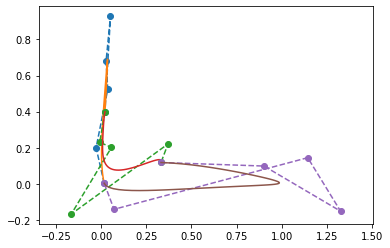

In [46]:
fig, ax = plt.subplots()
plot_fitpoints(display_pts[-1], show_points=True)


In [43]:
# for i in range(len(display_pts)):  
#     print(display_pts[i][0][4])
    

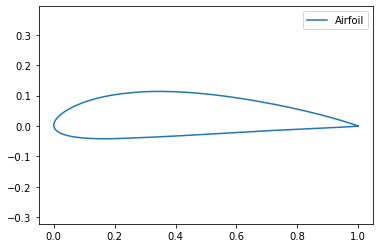

In [28]:
fig, ax = plt.subplots()
plot_polygon(ax, airfoil_points, 'Airfoil')


In [24]:
for i in range(len(random_points)):
    p = Polygon(get_fitpoints(random_points[i]))
    if type(p) != type(make_valid(p)):
        print("invalid")
        


valid


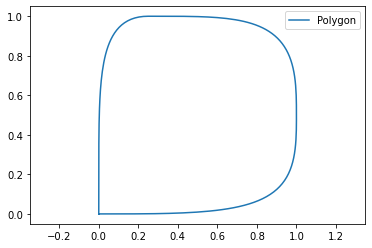

In [25]:
square = [
        np.array([[0, 0],
                  [0, 0.25],
                  [0, 0.5],
                  [0, 0.75],
                  [0, 1],
                  [0.25, 1]]),
        np.array([[0.25, 1],
                  [0.5, 1],
                  [0.75, 1],
                  [1, 1],
                  [1, 0.75],
                  [1, 0.5]]),
        np.array([[1, 0.5],
                  [1, 0.25],
                  [1, 0],
                  [0.75, 0],
                  [0.25, 0],
                  [0, 0]])
    ]

fig, ax = plt.subplots()
plot_polygon(ax, get_fitpoints(square), f'Polygon')
p = Polygon(get_fitpoints(square))
if type(p) == type(make_valid(p)):
    print("valid")

In [90]:
square

[[array([[0.  , 0.  ],
         [0.  , 0.25],
         [0.  , 0.5 ],
         [0.  , 0.75],
         [0.  , 1.  ],
         [0.25, 1.  ]]),
  array([[0.25, 1.  ],
         [0.5 , 1.  ],
         [0.75, 1.  ],
         [1.  , 1.  ],
         [1.  , 0.75],
         [1.  , 0.5 ]]),
  array([[1.  , 0.5 ],
         [1.  , 0.25],
         [1.  , 0.  ],
         [0.75, 0.  ],
         [0.25, 0.  ],
         [0.  , 0.  ]])]]

In [18]:
splines_list

[array([[ 1.0000000e+00,  0.0000000e+00],
        [ 9.8846330e-01, -5.5860000e-05],
        [ 9.6569154e-01, -8.3412400e-03],
        [ 8.3549163e-01, -2.6800000e-05],
        [ 5.6900095e-01, -2.7533810e-02],
        [ 2.6848452e-01, -3.8793790e-02]]),
 array([[ 0.26848452, -0.03879379],
        [ 0.14735268, -0.04431773],
        [-0.08993058, -0.05564962],
        [-0.04781671,  0.01014795],
        [ 0.0343588 ,  0.08910789],
        [ 0.24585186,  0.10859467]]),
 array([[0.24585186, 0.10859467],
        [0.45018424, 0.1312708 ],
        [0.67376853, 0.08496525],
        [0.84009265, 0.05561393],
        [0.9768977 , 0.00922272],
        [1.        , 0.        ]])]

In [17]:
from shapely.validation import make_valid
coords = [(0, 0), (0, 2), (1, 1)]
p = Polygon(coords)
type(make_valid(p)) == type(p)


True

In [9]:
from shapely.validation import make_valid

num_generations = 100
num_samples = 100
ran_range = 30
alpha = 0.01

# Mutation function
def mut(num):
    return (num + np.random.uniform(-alpha, alpha)) * np.random.uniform(1-alpha, 1+alpha)

# Set of slightly different squares to start with
random_points = []
for i in range(num_samples):
    shared1 = [mut(0), mut(0)]
    shared2 = [mut(0), mut(0)]
    shared3 = [mut(0), mut(0)]
    shape = [
        np.array([shared1,
                  [mut(0), mut(0)],
                  [mut(0), mut(0)],
                  [mut(0), mut(0)],
                  [mut(0), mut(0)],
                  shared2]),
        np.array([shared2,
                  [mut(0), mut(0)],
                  [mut(0), mut(0)],
                  [mut(0), mut(0)],
                  [mut(0), mut(0)],
                  shared3]),
        np.array([shared3,
                  [mut(0), mut(0)],
                  [mut(0), mut(0)],
                  [mut(0), mut(0)],
                  [mut(0), mut(0)],
                  shared1])]
    random_points.append(shape)
    

display_pts = []


for i in range(num_generations):
    # Rank solutions in reverse sorted order
    ranking = []

    for pts in random_points:
        # Checks to remove self intersecting geometries
        coords = get_fitpoints(pts)
        p = Polygon(coords)
        if type(make_valid(p)) == type(p):
            ranking.append((fitness(pts), pts))
    
    ranking.sort()
    ranking.reverse()

    print(f"Generation {i} best solution is: ")
    print(ranking[0])

    if i%10 == 0:
        fig, ax = plt.subplots()
        plot_fitpoints(ranking[0][1], show_points=True)
        plot_polygon(ax, airfoil_points, 'Airfoil')
        display_pts.append(ranking[0][1])

    # Randomly select and mutate next generation of tuples
    pt1, pt2, pt3, pt4, pt5, pt6, pt7, pt8, pt9, pt10, pt11, pt12, pt13, pt14, pt15 = ([] for i in range(15))

    for pt in ranking[:10]:
        pt1.append(pt[1][0][0])
        pt2.append(pt[1][0][1])
        pt3.append(pt[1][0][2])
        pt4.append(pt[1][0][3])
        pt5.append(pt[1][0][4])
        pt6.append(pt[1][1][0])
        pt7.append(pt[1][1][1])
        pt8.append(pt[1][1][2])
        pt9.append(pt[1][1][3])
        pt10.append(pt[1][1][4])
        pt11.append(pt[1][2][0])
        pt12.append(pt[1][2][1])
        pt13.append(pt[1][2][2])
        pt14.append(pt[1][2][3])
        pt15.append(pt[1][2][4])

    next_gen = []
    for i in range(100):
        p1 = mut(pt1[np.random.randint(0, len(pt1) - 1)])
        p2 = mut(pt2[np.random.randint(0, len(pt2) - 1)])
        p3 = mut(pt3[np.random.randint(0, len(pt3) - 1)])
        p4 = mut(pt4[np.random.randint(0, len(pt4) - 1)])
        p5 = mut(pt5[np.random.randint(0, len(pt5) - 1)])
        p6 = mut(pt6[np.random.randint(0, len(pt6) - 1)])
        p7 = mut(pt7[np.random.randint(0, len(pt7) - 1)])
        p8 = mut(pt8[np.random.randint(0, len(pt8) - 1)])
        p9 = mut(pt9[np.random.randint(0, len(pt9) - 1)])
        p10 = mut(pt10[np.random.randint(0, len(pt10) - 1)])
        p11 = mut(pt11[np.random.randint(0, len(pt11) - 1)])
        p12 = mut(pt12[np.random.randint(0, len(pt12) - 1)])
        p13 = mut(pt13[np.random.randint(0, len(pt13) - 1)])
        p14 = mut(pt14[np.random.randint(0, len(pt14) - 1)])
        p15 = mut(pt15[np.random.randint(0, len(pt15) - 1)])


        new_pts = [np.array([p1, p2, p3, p4, p5, p6]),
                   np.array([p6, p7, p8, p9, p10, p11]),
                   np.array([p11,p12,p13,p14,p15,p1])]
        
        next_gen.append(new_pts)
    random_points = next_gen



GEOSException: TopologyException: side location conflict at 0.003210595294323625 -0.0089224960374588852. This can occur if the input geometry is invalid.

[2 2 3 4 5 5 6 7 8 8]


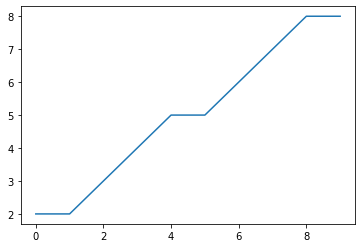

In [13]:
import numpy as np
from scipy.ndimage import gaussian_filter1d

def smooth_curve(points, sigma=2):
    smoothed_points = gaussian_filter1d(points, sigma=sigma)
    return smoothed_points

# Example usage
points = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
smoothed_points = smooth_curve(points)
print(smoothed_points)
plt.plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], smoothed_points)